# OSMnx

# Street network

In [25]:
import osmnx
import contextily as ctx

In [3]:
PLACE = 'Kamppi, Helsinki, Finland'
graph = osmnx.graph_from_place(PLACE)

In [4]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

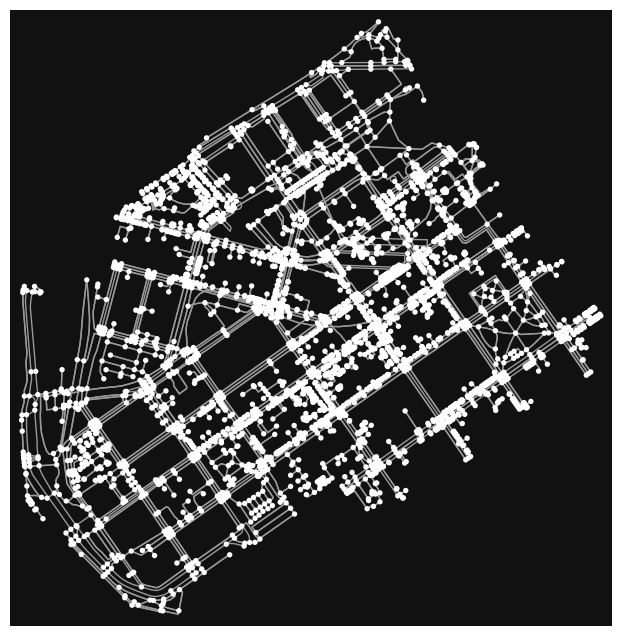

In [5]:
f, ax = osmnx.plot_graph(graph)

In [6]:
PLACE = 'Albuquerque, New Mexico, USA'
graph_abq = osmnx.graph_from_place(PLACE)

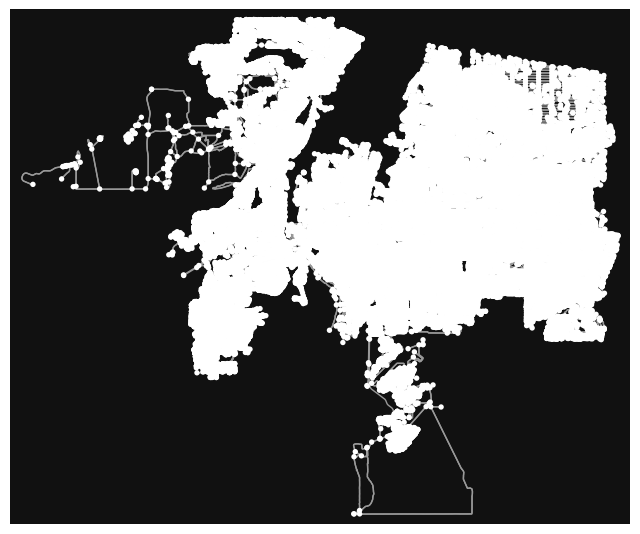

In [7]:
f, ax = osmnx.plot_graph(graph_abq)

In [8]:
PLACE = 'Santa Fe, New Mexico, USA'
graph_sf = osmnx.graph_from_place(PLACE)

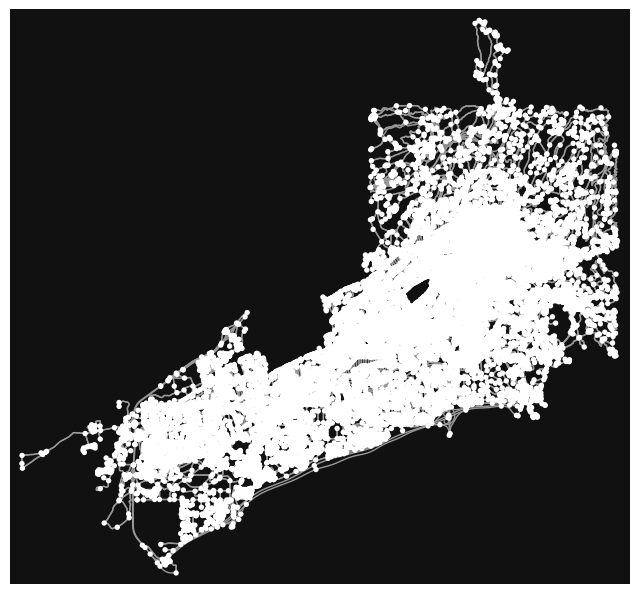

In [9]:
f, ax = osmnx.plot_graph(graph_sf)

# Graph to GeoDataFrame

In [10]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [12]:
nodes.columns, edges.columns

(Index(['y', 'x', 'street_count', 'railway', 'highway', 'ref', 'geometry'], dtype='object'),
 Index(['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'oneway', 'reversed',
        'length', 'geometry', 'junction', 'width', 'tunnel', 'access',
        'service', 'bridge'],
       dtype='object'))

# Place polygon

In [13]:
PLACE = 'Kamppi, Helsinki, Finland'
area = osmnx.geocode_to_gdf(PLACE)

In [14]:
type(area)

geopandas.geodataframe.GeoDataFrame

In [15]:
area

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",24.920643,60.160469,24.943464,60.172075,153777441,relation,184714,60.167626,24.931709,boundary,administrative,20,0.466964,suburb,Kamppi,"Kamppi, Southern major district, Helsinki, Hel..."


<Axes: >

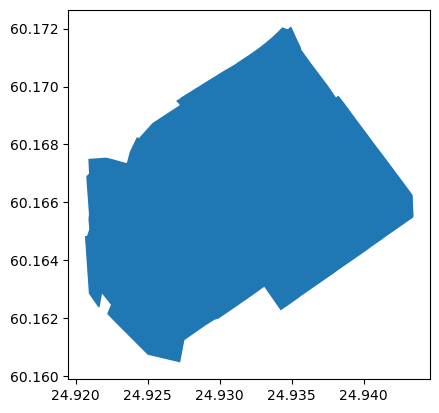

In [16]:
area.plot()

# Building footprints

In [18]:
buildings = osmnx.features_from_place(
    PLACE,
    {'building': True}
)
len(buildings)

451

In [19]:
buidlings.columns

Index(['geometry', 'addr:city', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'building', 'name', 'opening_hours', 'operator', 'phone',
       ...
       'unisex', 'covered', 'area', 'leisure', 'construction', 'type', 'ele',
       'electrified', 'note', 'nohousenumber'],
      dtype='object', length=119)

# Points of interest

## Restaurants

In [20]:
restaurants = osmnx.features_from_place(
    PLACE, 
    {"amenity": 'restaurant'}
)
len(restaurants)

160

In [21]:
restaurants.columns.values

array(['geometry', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'amenity', 'cuisine', 'diet:halal',
       'diet:kosher', 'name', 'payment:credit_cards',
       'payment:debit_cards', 'phone', 'website', 'wheelchair', 'email',
       'facebook', 'indoor_seating', 'level', 'opening_hours',
       'outdoor_seating', 'short_name', 'start_date',
       'toilets:wheelchair', 'check_date', 'delivery:covid19',
       'opening_hours:covid19', 'takeaway:covid19', 'diet:vegetarian',
       'name:fi', 'name:zh', 'payment:cash', 'diet:vegan',
       'disused:amenity', 'addr:housename', 'access:covid19',
       'drive_through:covid19', 'takeaway', 'toilets', 'contact:facebook',
       'contact:phone', 'note', 'opening_hours:brunch', 'source',
       'contact:website', 'capacity', 'smoking', 'dog', 'operator',
       'shop', 'air_conditioning', 'alt_name', 'internet_access',
       'contact:email', 'established', 'opening_hours:kitchen',
       'description

> Select useful columns

In [23]:
interesting_columns = [
    'name', 
    'opening_hours', 
    'addr:city', 'addr:country', 
    'addr:postcode', 'addr:street'
]
restaurants[interesting_columns].head(10)

name  \
element id                                   
node    60062502                    Kabuki   
        62965963   Restaurant & Bar Fusion   
        76617692              Johan Ludvig   
        76624339                   Shinobi   
        76624351                    Pueblo   
        151006260          Ravintola China   
        151006483                    Sekel   
        151006932               Haru Sushi   
        151007074                     Koto   
        248343226                  Mei Lin   

                                                       opening_hours  \
element id                                                             
node    60062502                                                 NaN   
        62965963                  Mo-Th 11-22; Fr-Sa 11-02; Su 12-20   
        76617692                                                 NaN   
        76624339                We-Th 17:00-23:00; Fr-Sa 16:00-24:00   
        76624351                                                 NaN   
        151006260       Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off   
        151006483                                                NaN   
        151006932  Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00   
        151007074                                                NaN   
        248343226               Tu-Fr 11:00-21:30; Sa,Su 12:00-21:30   

                  addr:city addr:country addr:postcode      addr:street  
element id                                                               
node    60062502   Helsinki           FI         00180  Lapinlahdenkatu  
        62965963        NaN          NaN           NaN              NaN  
        76617692   Helsinki           FI           NaN              NaN  
        76624339   Helsinki           FI         00120     Albertinkatu  
        76624351   Helsinki           FI           NaN      Eerikinkatu  
        151006260  Helsinki           FI         00100        Annankatu  
        151006483  Helsinki           FI         00120        Bulevardi  
        151006932  Helsinki           FI         00120    Fredrikinkatu  
        151007074  Helsinki           FI         00120    Lönnrotinkatu  
        248343226  Helsinki           FI         00100        Annankatu

## Parks

In [24]:
parks = osmnx.features_from_place(
    PLACE, 
    {
        'leisure': 'park', 
        'landuse': 'grass'
    }
)
len(parks)

121

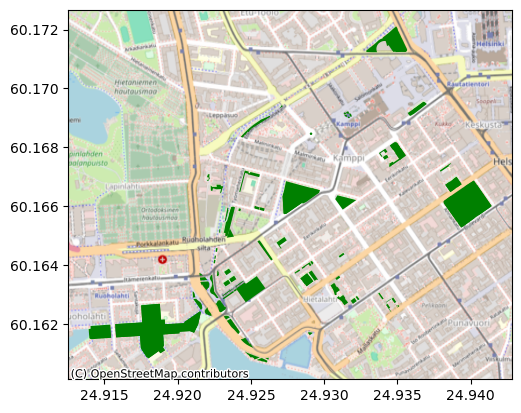

In [26]:
ax = parks.plot(color='green')
ctx.add_basemap(ax, crs=parks.crs, 
               source=ctx.providers.OpenStreetMap.Mapnik);

In [27]:
import matplotlib.pyplot as plt

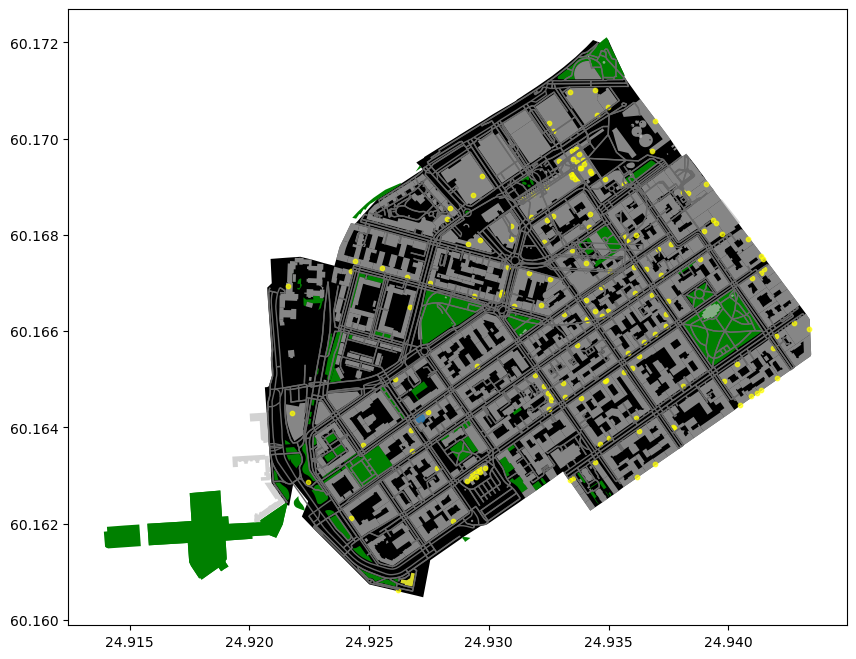

In [28]:
f, ax = plt.subplots(figsize=(12,8))

area.plot(ax=ax, fc='k')
parks.plot(ax=ax, fc='g')
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buidlings.plot(ax=ax, facecolor='silver', alpha=0.7)
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10);

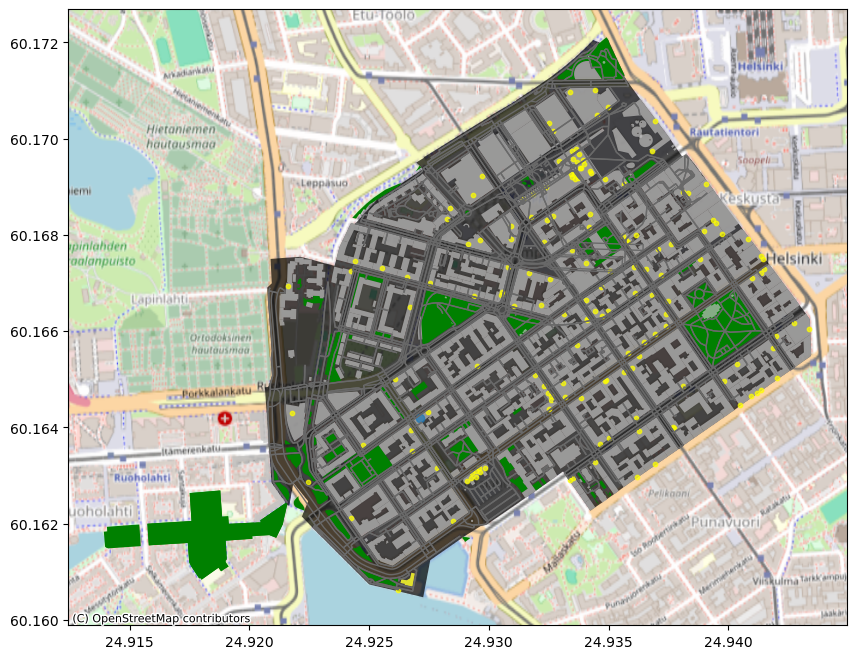

In [29]:
f, ax = plt.subplots(figsize=(12,8))

area.plot(ax=ax, fc='k', alpha=0.7)
parks.plot(ax=ax, fc='g')
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buidlings.plot(ax=ax, facecolor='silver', alpha=0.7)
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
ctx.add_basemap(ax, crs=parks.crs, source=ctx.providers.OpenStreetMap.Mapnik);

In [31]:
osmnx.io.save_graph_geopackage(graph_abq, '../data/local/abq_graph.gpkg')

In [32]:
osmnx.io.save_graph_geopackage(graph_sf, '../data/local/sf_graph.gpkg')

In [33]:
osmnx.io.save_graph_geopackage(graph, '../data/local/fi_graph.gpkg')